##### Instructions: Have all the code for all the questions in one Jupyter notebook and upload the file at the time of submission. I will only consider this file format for grading. Run all the cells before uploading the file. So, after you uploaded the file, check the file extension and if it is not an ipynb, then upload the right file.

# Consider population.csv file that is in the categorical_cols folder and answer the following:

### Use the Markdown feature in the notebook to explain the steps. 

## 1. Separate categorical columns from numerical columns. Apply OneHot encoding to categorical features.

In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import make_column_selector as col_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler

In [2]:
df = pd.read_csv('class4/categorical_cols/population.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Job Type          32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Job Title         32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.dtypes

Age                  int64
Job Type            object
Final Weight         int64
Education           object
Education Number     int64
Marital Status      object
Job Title           object
Relationship        object
Race                object
Gender              object
Capital Gain         int64
Capital Loss         int64
Hours per week       int64
Country             object
Income              object
dtype: object

In [5]:
df['Job Type'].value_counts()

Job Type
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [6]:
df['Education Number'].value_counts()

Education Number
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

## After looking at some columns in the data, we notice that there are '?' values
## Let's convert to 'Other' to be consistent

In [7]:
df["Job Type"] = df["Job Type"].str.replace("?", "Other")
df["Country"] = df["Country"].str.replace("?", "Other")
df["Job Title"] = df["Job Title"].str.replace("?", "Other")

## Separate out the features from the labels

In [8]:
df_y = df["Income"]
df_x = df.drop(["Income"], axis=1)
df_copy = df.copy(deep=True)

## Find and separate the categorical columns

In [9]:
# categorical_cols_obj is a categorical object
categorical_cols_obj = col_selector(dtype_include=object)
print(type(categorical_cols_obj))

# categorical_features is a list of  column names of features with catergorical data
categorical_features = categorical_cols_obj(df_x)
print(type(categorical_features))


print(categorical_features)

<class 'sklearn.compose._column_transformer.make_column_selector'>
<class 'list'>
['Job Type', 'Education', 'Marital Status', 'Job Title', 'Relationship', 'Race', 'Gender', 'Country']


In [10]:
df_cat = df_x[categorical_features]
print(df_cat.head())

            Job Type   Education       Marital Status           Job Title  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     Relationship    Race   Gender         Country  
0   Not-in-family   White     Male   United-States  
1         Husband   White     Male   United-States  
2   Not-in-family   White     Male   United-States  
3         Husband   Black     Male   United-States  
4            Wife   Black   Female            Cuba  


## Conclusion
 We will apply One Hot Encoding in the final step with the preprocessor

## 2. Identify the numerical features that are normally distributed using Shapiro Wilk's test and apply standard scaler on the features that are normally distributed and min-max on the non-normal numerical features.

In [11]:
from scipy import stats
import seaborn as sns

In [12]:
# numeric_features is a list of column names of features with numeric data
int_cols_obj = col_selector(dtype_include="int64")
numeric_features = int_cols_obj(df_x)

print(numeric_features)

['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per week']


## Check for normal distribution visually using histograms

<Axes: xlabel='Age', ylabel='Count'>

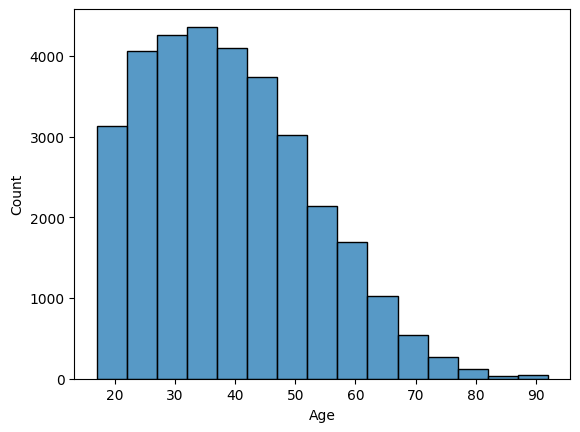

In [13]:
sns.histplot(data=df_x["Age"], binwidth=5)

<Axes: xlabel='Education Number', ylabel='Count'>

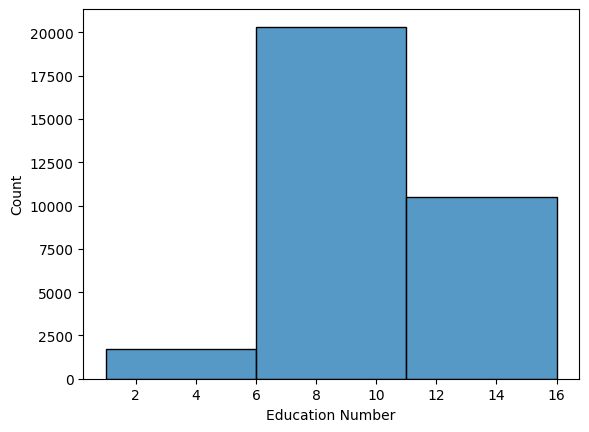

In [14]:
sns.histplot(data=df_x["Education Number"], binwidth=5)

<Axes: xlabel='Hours per week', ylabel='Count'>

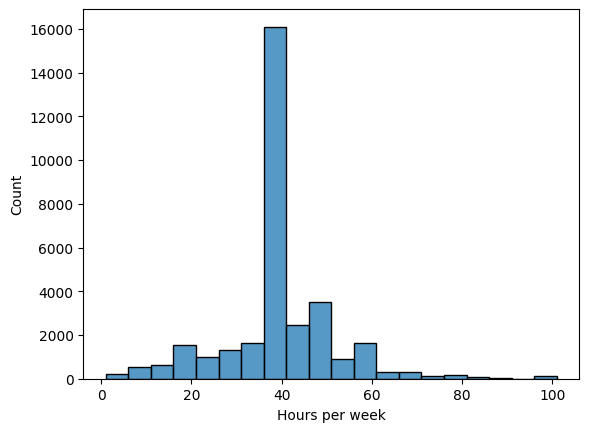

In [15]:
sns.histplot(data=df_x["Hours per week"], binwidth=5)

In [16]:
for feature in numeric_features:
    shapiro = stats.shapiro(df_x[feature]) 
    print(feature)
    print(shapiro)
    print()

Age
ShapiroResult(statistic=0.9668066501617432, pvalue=0.0)

Final Weight
ShapiroResult(statistic=0.9223408699035645, pvalue=0.0)

Education Number
ShapiroResult(statistic=0.9264373779296875, pvalue=0.0)

Capital Gain
ShapiroResult(statistic=0.12271404266357422, pvalue=0.0)

Capital Loss
ShapiroResult(statistic=0.21831119060516357, pvalue=0.0)

Hours per week
ShapiroResult(statistic=0.8851711750030518, pvalue=0.0)



/Users/marconardin/Documents/berkextension_py_ml_class/ml_class_venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Conclusion
- all of the numeric features have a pvalue of 0, so we reject the null hypothesis
- none of the numeric features are normally distributed
- we will use min max scaling instead of standard scaling for all the features

### (see part 3)

## 3. Then use preprocessor and makepipeline (or pipeline) to automatically apply the transformations and logistic regression and make prediction. Print confusion matrix, accuracy score and AUC.

In [17]:
from sklearn import metrics, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

## First, the target feature is categorical and needs to be converted
## we'll use LabelEncoder

In [18]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df_y)

## Make the pipeline that applies the column transforms
## Train Test split 
## Fit the Logistic Regression Model and
## Get the model score (accuracy)

In [19]:
np.random.seed(0)

# features
x = df_x

# apply Standard Scaler on numerical features and
# apply One Hot Encoder on categorical features
preprocessor = ColumnTransformer(
               transformers=[
               ('num', MinMaxScaler(), numeric_features),
               ('cat', OneHotEncoder(), categorical_features)])

clf = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

clf.fit(x_train, y_train)
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.846


## Accuracy is 84.6%
This is not bad, we can try to increase this maybe by doing some feature selection and/or hyperparameter tuning
i.e. for hyperparameter tuning, we could try training Logistic Regression models with different penalties (L1 or L2), C values, or solvers (like lbfgs or liblinear)

## Create prediction for Confusion Matrix

In [20]:
y_pred = clf.predict(x_test)

## Show Confusion Matrix

[[4549  369]
 [ 636  959]]


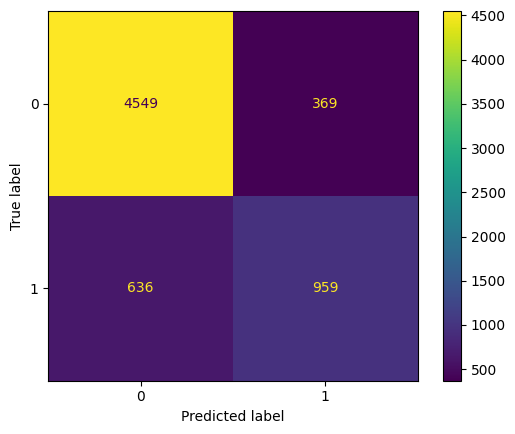

In [21]:
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Get probabilities for AUC and ROC

In [22]:
y_prob = clf.predict_proba(x_test)
y_prob = y_prob[:, 1]

## Calculate AUC

In [23]:
logit_roc_auc = roc_auc_score(y_test, y_prob)
print("Logistic AUC = %0.2f" %logit_roc_auc)

Logistic AUC = 0.90


## Plot ROC curve

In [24]:
fpr, tpr, threshold = roc_curve(y_test, y_prob)

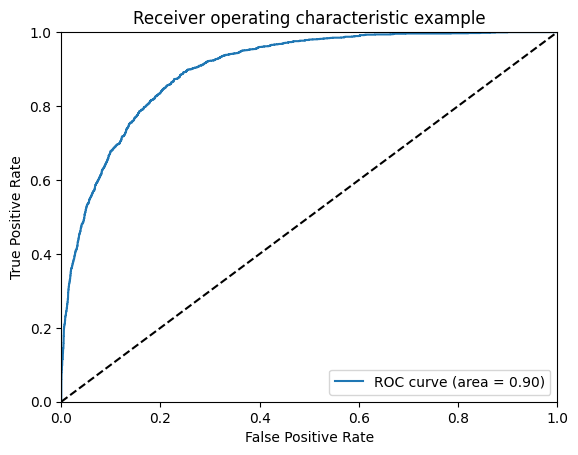

In [25]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Conclusion:
The AUC = 0.90 which is high. We're definitely better than randomly guessing income which would be represented as AUC = 0.5